In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Algoritmos de ML
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Experimentos/Datos/dataset-inception.csv')
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Experimentos/Datos/cuatro-categorias.csv')

In [ ]:
X = np.array(X)
Y = np.array(Y)
Y = Y.reshape(200,)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
mlp_acuracies_test = []
mlp_acuracies_train = []

rf_acuracies_test = []
rf_acuracies_train = []

lr_acuracies_test = []
lr_acuracies_train = []

svm_acuracies_test = []
svm_acuracies_train = []

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  MLP_clf = MLPClassifier(hidden_layer_sizes=(1, 2048), solver = 'adam', max_iter=512, random_state=1)
  RF_clf = RandomForestClassifier(n_estimators = 22, max_depth=5, random_state = 1, min_samples_leaf = 1,)
  LR_clf = LogisticRegression(max_iter=1000)
  SVM_clf = svm.SVC()

  MLP_clf.fit(X_train, y_train)
  RF_clf.fit(X_train, y_train)
  LR_clf.fit(X_train, y_train)
  SVM_clf.fit(X_train, y_train)

  mlp_acuracies_test.append(MLP_clf.score(X_test, y_test))
  mlp_acuracies_train.append(MLP_clf.score(X_train, y_train))

  rf_acuracies_test.append(RF_clf.score(X_test, y_test))
  rf_acuracies_train.append(RF_clf.score(X_train, y_train))

  lr_acuracies_test.append(LR_clf.score(X_test, y_test))
  lr_acuracies_train.append(LR_clf.score(X_train, y_train))

  svm_acuracies_test.append(SVM_clf.score(X_test, y_test))
  svm_acuracies_train.append(SVM_clf.score(X_train, y_train))

In [ ]:
mlp_acuracies_test = np.array(mlp_acuracies_test)
mlp_acuracies_train = np.array(mlp_acuracies_train)

rf_acuracies_test = np.array(rf_acuracies_test)
rf_acuracies_train = np.array(rf_acuracies_train)

lr_acuracies_test = np.array(lr_acuracies_test)
lr_acuracies_train = np.array(lr_acuracies_train)

svm_acuracies_test = np.array(svm_acuracies_test)
svm_acuracies_train = np.array(svm_acuracies_train)

In [ ]:
print('MLP')
print('test')
print(mlp_acuracies_test)
print('train')
print(mlp_acuracies_train)
print('------------------------')
print('Random Forest')
print('test')
print(rf_acuracies_test)
print('train')
print(rf_acuracies_train)
print('------------------------')
print('Regresion lineal')
print('test')
print(lr_acuracies_test)
print('train')
print(lr_acuracies_train)
print('------------------------')
print('SVM')
print('test')
print(svm_acuracies_test)
print('train')
print(svm_acuracies_train)

MLP
test
[0.65 0.75 0.55 0.8  0.65 0.65 0.65 0.45 0.7  0.65]
train
[0.92777778 0.92222222 0.95       0.94444444 0.87777778 0.88888889
 0.93888889 0.93888889 0.91666667 0.92777778]
------------------------
Random Forest
test
[0.5  0.65 0.65 0.55 0.8  0.7  0.65 0.5  0.65 0.7 ]
train
[0.99444444 1.         0.99444444 0.99444444 0.99444444 0.98888889
 1.         1.         0.98888889 1.        ]
------------------------
Regresion lineal
test
[0.6  0.7  0.75 0.7  0.75 0.8  0.75 0.75 0.6  0.7 ]
train
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
------------------------
SVM
test
[0.65 0.7  0.65 0.7  0.75 0.8  0.8  0.6  0.65 0.65]
train
[0.98333333 0.97777778 0.97222222 0.97222222 0.96666667 0.96111111
 0.96666667 0.98333333 0.97777778 0.95555556]


In [ ]:
print('PERCEPTRON MULTICAPA')
print(f'Prueba: {mlp_acuracies_test.mean()}')
print(f'Entrenamiento: {mlp_acuracies_train.mean()}')

print('\nBOSQUES ALEATORIOS')
print(f'Prueba: {rf_acuracies_test.mean()}')
print(f'Entrenamiento: {rf_acuracies_train.mean()}')

print('\nREGRESIÓN LOGÍSTICA')
print(f'Prueba: {lr_acuracies_test.mean()}')
print(f'Entrenamiento: {lr_acuracies_train.mean()}')

print('\nMÁQUINAS DE SOPORTE VECTORIAL')
print(f'Prueba: {svm_acuracies_test.mean()}')
print(f'Entrenamiento: {svm_acuracies_train.mean()}')

PERCEPTRON MULTICAPA
Prueba: 0.6500000000000001
Entrenamiento: 0.9233333333333332

BOSQUES ALEATORIOS
Prueba: 0.635
Entrenamiento: 0.9955555555555555

REGRESIÓN LOGÍSTICA
Prueba: 0.71
Entrenamiento: 1.0

MÁQUINAS DE SOPORTE VECTORIAL
Prueba: 0.6950000000000001
Entrenamiento: 0.9716666666666667


In [ ]:
pruebas = []
entrenamientos = []

pruebas.append(mlp_acuracies_test.mean())
pruebas.append(rf_acuracies_test.mean())
pruebas.append(lr_acuracies_test.mean())
pruebas.append(svm_acuracies_test.mean())

entrenamientos.append(mlp_acuracies_train.mean())
entrenamientos.append(rf_acuracies_train.mean())
entrenamientos.append(lr_acuracies_train.mean())
entrenamientos.append(svm_acuracies_train.mean())

print(pruebas)
print(entrenamientos)

[0.6500000000000001, 0.635, 0.71, 0.6950000000000001]
[0.9233333333333332, 0.9955555555555555, 1.0, 0.9716666666666667]


In [ ]:
print('PRUEBA')
print('PREDICCIONES DEL PERCEPTRÓN MULTICAPA')
mlp_predictions = MLP_clf.predict(X_test)
print(classification_report(mlp_predictions, y_test))

print('\nPREDICCIONES DE BOSQUES ALEATORIOS')
rf_predictions = RF_clf.predict(X_test)
print(classification_report(rf_predictions, y_test))

print('\nPREDICCIONES DE REGRESIÓN LOGÍSTICA')
lr_predictions = LR_clf.predict(X_test)
print(classification_report(lr_predictions, y_test))

print('\nPREDICCIONES DE MÁQUINAS DE SOPORTE VECTORIAL')
svm_predictions = SVM_clf.predict(X_test)
print(classification_report(svm_predictions, y_test))

PRUEBA
PREDICCIONES DEL PERCEPTRÓN MULTICAPA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.50      0.57         4
           2       0.70      0.88      0.78         8
           3       1.00      0.67      0.80         6

    accuracy                           0.65        20
   macro avg       0.59      0.51      0.54        20
weighted avg       0.71      0.65      0.67        20


PREDICCIONES DE BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.67      0.67      0.67         3
           2       0.70      0.88      0.78         8
           3       1.00      0.80      0.89         5

    accuracy                           0.70        20
   macro avg       0.68      0.65      0.65        20
weighted avg       0.70      0.70      0.69        20


PREDICCIONES DE REGRESIÓN LOGÍSTICA
            

In [ ]:
print('ENTRENAMIENTO')
print('PREDICCIONES DEL PERCEPTRÓN MULTICAPA')
mlp_predictions = MLP_clf.predict(X_train)
print(classification_report(mlp_predictions, y_train))

print('\nPREDICCIONES DE BOSQUES ALEATORIOS')
rf_predictions = RF_clf.predict(X_train)
print(classification_report(rf_predictions, y_train))

print('\nPREDICCIONES DE REGRESIÓN LOGÍSTICA')
lr_predictions = LR_clf.predict(X_train)
print(classification_report(lr_predictions, y_train))

print('\nPREDICCIONES DE MÁQUINAS DE SOPORTE VECTORIAL')
svm_predictions = SVM_clf.predict(X_train)
print(classification_report(svm_predictions, y_train))

ENTRENAMIENTO
PREDICCIONES DEL PERCEPTRÓN MULTICAPA
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        35
           1       0.98      1.00      0.99        46
           2       1.00      0.75      0.86        53
           3       1.00      1.00      1.00        46

    accuracy                           0.93       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.94      0.93      0.93       180


PREDICCIONES DE BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        46

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


PREDICCIONES DE REGRESIÓN LOGÍSTICA
     

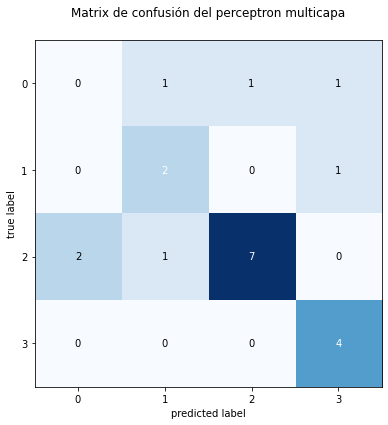

In [ ]:
y_pred = MLP_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión del perceptron multicapa')
plt.tight_layout()

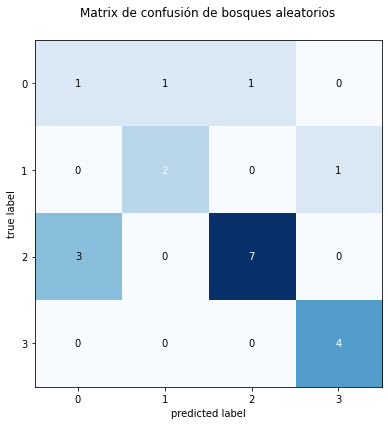

In [ ]:
y_pred = RF_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de bosques aleatorios')
plt.tight_layout()

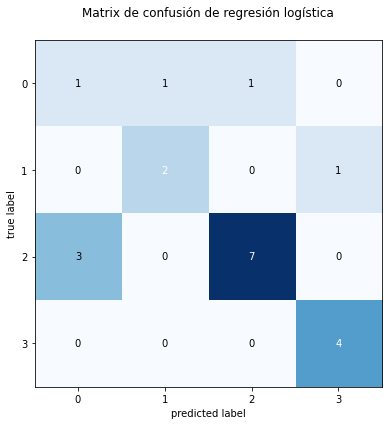

In [ ]:
y_pred = LR_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de regresión logística')
plt.tight_layout()

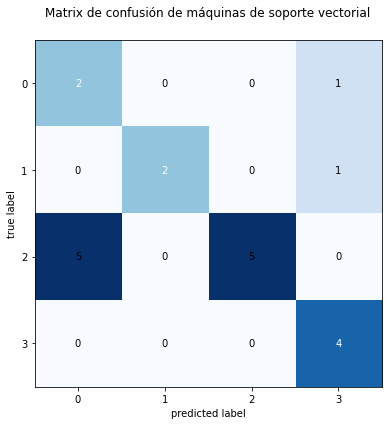

In [ ]:
y_pred = SVM_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de máquinas de soporte vectorial')
plt.tight_layout()

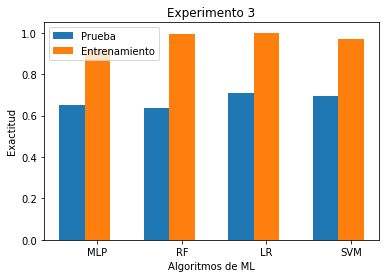

In [ ]:
# prueba = [0.37, 0.55, 0.4699999999999999, 0.6250000000000001]
# entrenamiento = [0.8355555555555556, 0.9927777777777778, 1.0, 0.9494444444444443]

n_grupos = len(pruebas)
indice_barras = np.arange(n_grupos)
ancho_barra = 0.3

plt.bar(indice_barras, pruebas, width=ancho_barra, label='Prueba')
plt.bar(indice_barras + ancho_barra, entrenamientos, width=ancho_barra, label='Entrenamiento')
plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barra, ('MLP', 'RF', 'LR', 'SVM'))

plt.ylabel('Exactitud')
plt.xlabel('Algoritmos de ML')
plt.title('Experimento 3')

plt.show()